# About the notebook
[Back to the topic](pathway_toc.ipynb)

We are in step 05 now. 

<img src="./fig/03 pathway analysis steps.png">

----

# Set environment

In [2]:
source("Pathway_config.R")
source("Pathway_util.R")
library(pathview)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,


# Import data

In [3]:
attach(file.path(OUTDIR, "dds_rld.RData"))
attach(file.path(OUTDIR, "genesets_cne_h99.RData"))
attach(file.path(OUTDIR, "res_gage.RData"))

which pathway should we choose? Here we will use the top one pathway as our example. Recall that being statistically significance does not imply it is definitely biologically significance.

In [3]:
gageres_media$greater %>% head(2)

,p.geomean,stat.mean,p.val,q.val,set.size,exp1
ec00053 | Ascorbate and aldarate metabolism,4.502818e-06,4.561043,4.502818e-06,0.001328574,100,4.502818e-06
ec00051 | Fructose and mannose metabolism,1.034578e-05,4.365729,1.034578e-05,0.001328574,103,1.034578e-05


# Heatmap visualization

## 01 get gene list

In [4]:
get_gset_name_from_id("ec00053", genesets_cne_h99)

[1] "ec00053 | Ascorbate and aldarate metabolism"

In [5]:
get_gset_lst_from_id("ec00053", genesets_cne_h99)

[1] "CNAG_00005" "CNAG_00030" "CNAG_00032" "CNAG_00105" "CNAG_00141"
  [6] "CNAG_00251" "CNAG_00263" "CNAG_00331" "CNAG_00390" "CNAG_00488"
 [11] "CNAG_00601" "CNAG_00644" "CNAG_00696" "CNAG_00735" "CNAG_00836"
 [16] "CNAG_01078" "CNAG_01079" "CNAG_01097" "CNAG_01116" "CNAG_01257"
 [21] "CNAG_01421" "CNAG_01512" "CNAG_01558" "CNAG_01615" "CNAG_01744"
 [26] "CNAG_01776" "CNAG_01777" "CNAG_01794" "CNAG_01846" "CNAG_01896"
 [31] "CNAG_01914" "CNAG_01947" "CNAG_01952" "CNAG_01954" "CNAG_01987"
 [36] "CNAG_02012" "CNAG_02081" "CNAG_02109" "CNAG_02181" "CNAG_02182"
 [41] "CNAG_02312" "CNAG_02375" "CNAG_02377" "CNAG_02473" "CNAG_02478"
 [46] "CNAG_02553" "CNAG_02602" "CNAG_02717" "CNAG_02860" "CNAG_03011"
 [51] "CNAG_03240" "CNAG_03400" "CNAG_03560" "CNAG_03564" "CNAG_03697"
 [56] "CNAG_03854" "CNAG_03983" "CNAG_04112" "CNAG_04152" "CNAG_04183"
 [61] "CNAG_04209" "CNAG_04392" "CNAG_04410" "CNAG_04417" "CNAG_04475"
 [66] "CNAG_04498" "CNAG_04657" "CNAG_04753" "CNAG_04869" "CNAG_04955"
 [71] "CNAG_04969" "CNAG_05095" "CNAG_05113" "CNAG_05379" "CNAG_05534"
 [76] "CNAG_05607" "CNAG_05639" "CNAG_05677" "CNAG_05692" "CNAG_05842"
 [81] "CNAG_05915" "CNAG_05979" "CNAG_05991" "CNAG_06027" "CNAG_06065"
 [86] "CNAG_06080" "CNAG_06122" "CNAG_06504" "CNAG_06623" "CNAG_06628"
 [91] "CNAG_06644" "CNAG_06764" "CNAG_06922" "CNAG_07318" "CNAG_07544"
 [96] "CNAG_07547" "CNAG_07731" "CNAG_07740" "CNAG_07782" "CNAG_07801"

of course, there is a helper function to output the index if you know the name of pathway

In [22]:
get_gset_idx_from_name(c("Ascorbate"), genesets_cne_h99)

[1]    7  387  905  925 1048 1149 1264 1689 1732 1755 1766

In [7]:
get_gset_idx_from_name(c("Ascorbate", "aldarate"), genesets_cne_h99)

[1] 7

In [8]:
genesets_cne_h99[7]

$`ec00053 | Ascorbate and aldarate metabolism`
  [1] "CNAG_00005" "CNAG_00030" "CNAG_00032" "CNAG_00105" "CNAG_00141"
  [6] "CNAG_00251" "CNAG_00263" "CNAG_00331" "CNAG_00390" "CNAG_00488"
 [11] "CNAG_00601" "CNAG_00644" "CNAG_00696" "CNAG_00735" "CNAG_00836"
 [16] "CNAG_01078" "CNAG_01079" "CNAG_01097" "CNAG_01116" "CNAG_01257"
 [21] "CNAG_01421" "CNAG_01512" "CNAG_01558" "CNAG_01615" "CNAG_01744"
 [26] "CNAG_01776" "CNAG_01777" "CNAG_01794" "CNAG_01846" "CNAG_01896"
 [31] "CNAG_01914" "CNAG_01947" "CNAG_01952" "CNAG_01954" "CNAG_01987"
 [36] "CNAG_02012" "CNAG_02081" "CNAG_02109" "CNAG_02181" "CNAG_02182"
 [41] "CNAG_02312" "CNAG_02375" "CNAG_02377" "CNAG_02473" "CNAG_02478"
 [46] "CNAG_02553" "CNAG_02602" "CNAG_02717" "CNAG_02860" "CNAG_03011"
 [51] "CNAG_03240" "CNAG_03400" "CNAG_03560" "CNAG_03564" "CNAG_03697"
 [56] "CNAG_03854" "CNAG_03983" "CNAG_04112" "CNAG_04152" "CNAG_04183"
 [61] "CNAG_04209" "CNAG_04392" "CNAG_04410" "CNAG_04417" "CNAG_04475"
 [66] "CNAG_04498" "CNAG_04657" "CNAG_04753" "CNAG_04869" "CNAG_04955"
 [71] "CNAG_04969" "CNAG_05095" "CNAG_05113" "CNAG_05379" "CNAG_05534"
 [76] "CNAG_05607" "CNAG_05639" "CNAG_05677" "CNAG_05692" "CNAG_05842"
 [81] "CNAG_05915" "CNAG_05979" "CNAG_05991" "CNAG_06027" "CNAG_06065"
 [86] "CNAG_06080" "CNAG_06122" "CNAG_06504" "CNAG_06623" "CNAG_06628"
 [91] "CNAG_06644" "CNAG_06764" "CNAG_06922" "CNAG_07318" "CNAG_07544"
 [96] "CNAG_07547" "CNAG_07731" "CNAG_07740" "CNAG_07782" "CNAG_07801"

## 02 plot the heatmap

lets get the gene list of the pathway and start plotting

In [9]:
rld    <- rld_add
genelst <- get_gset_lst_from_id("ec00053", genesets_cne_h99)

The first plot

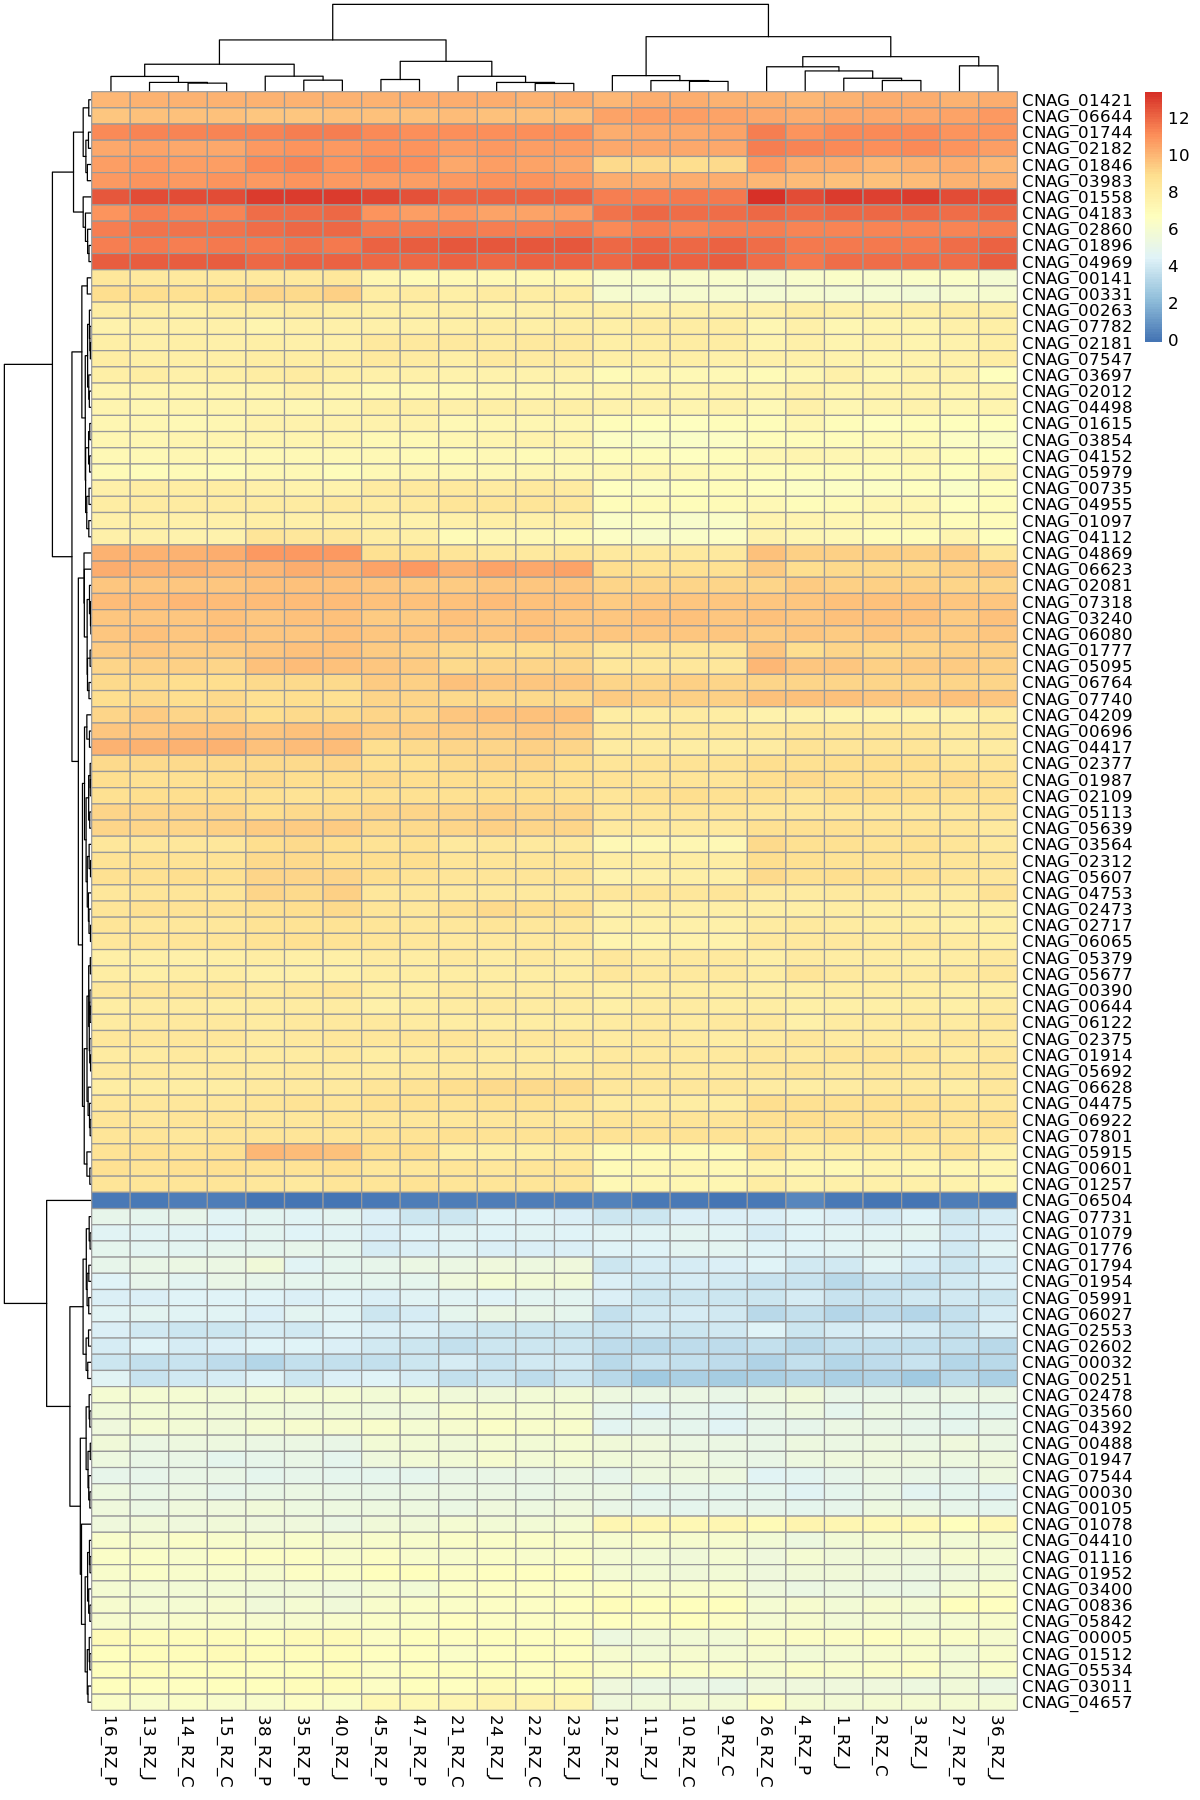

In [10]:
### Heatmap for geneset based on rlog transformed "expressions"
options(repr.plot.width = 10, repr.plot.height = 15)
pheatmap(assay(rld)[genelst,])

Of couse, you need to convert the expression of each gene into the same scale to compare them across different samples

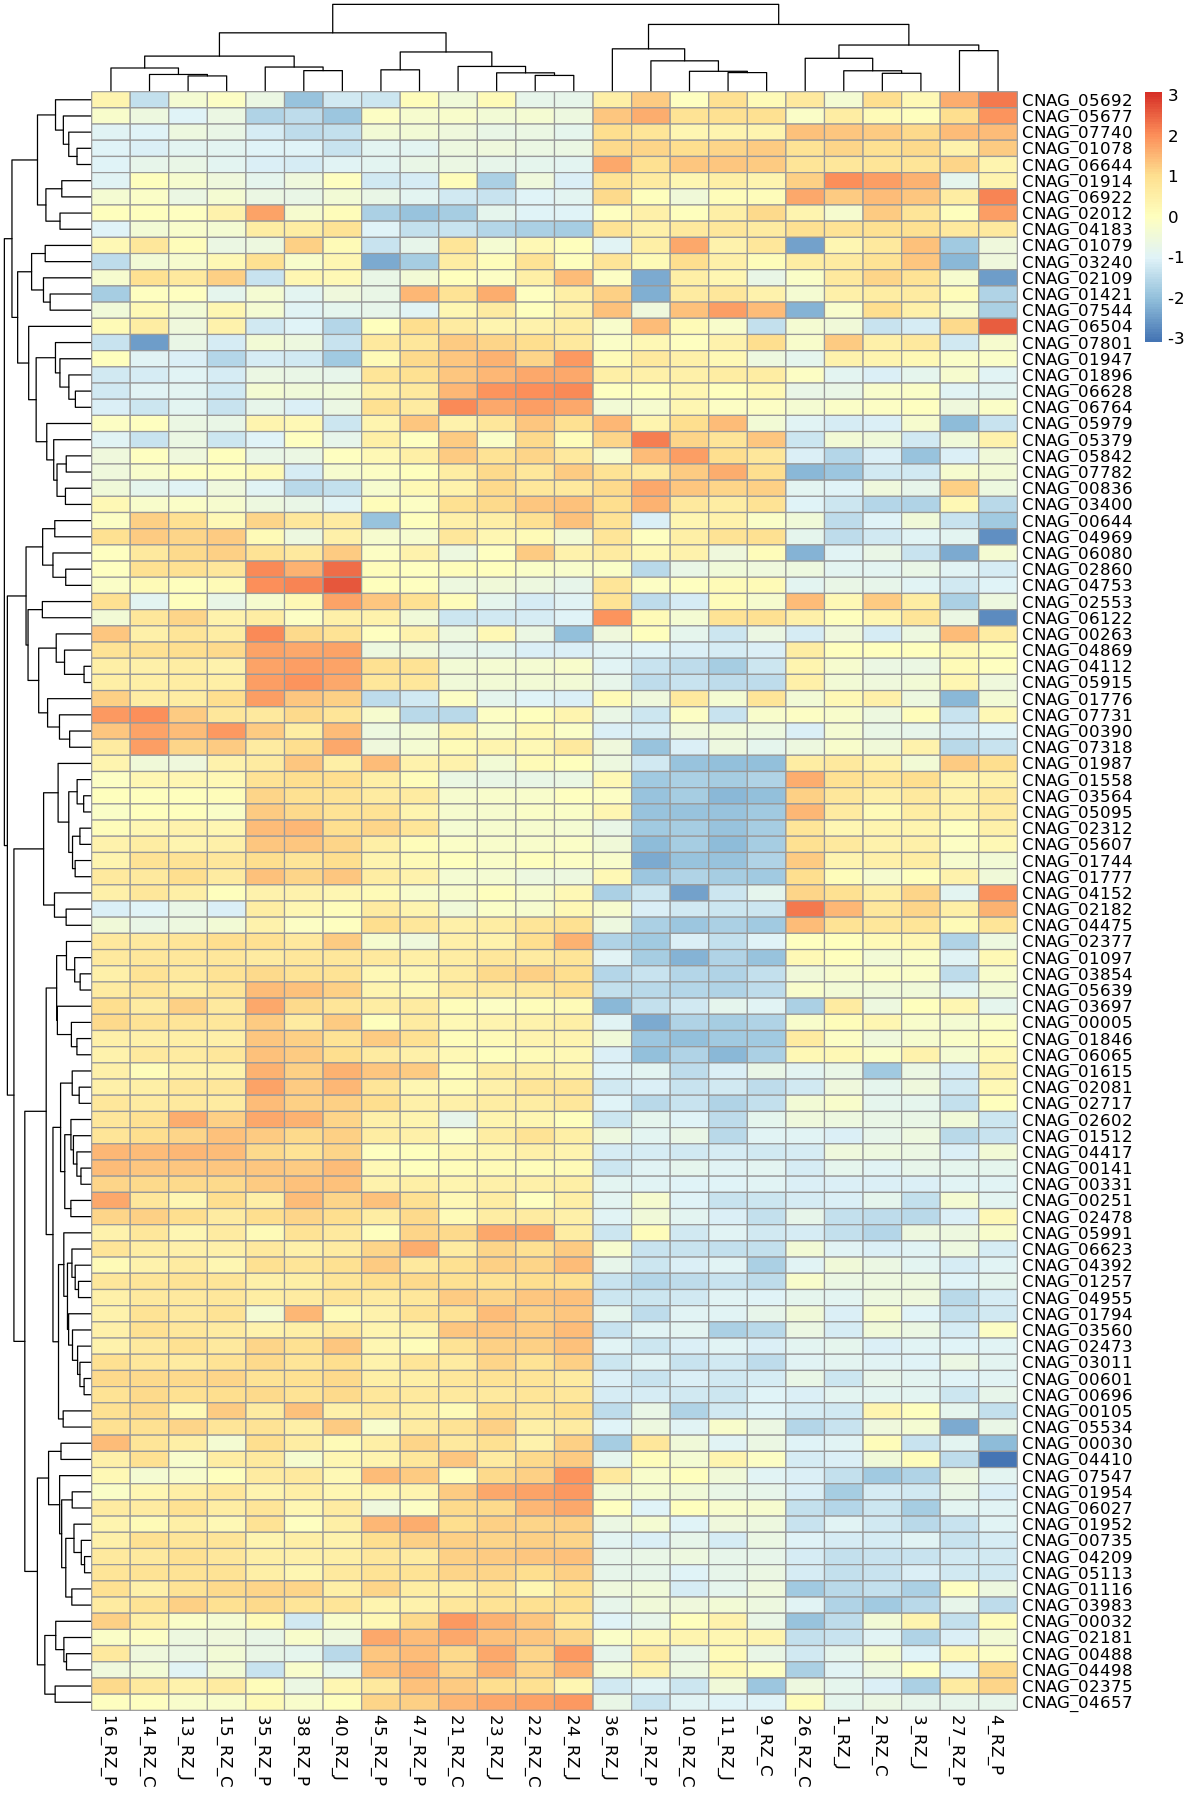

In [11]:
### Make sure to scale across the rows
options(repr.plot.width = 10, repr.plot.height = 15)
pheatmap(assay(rld)[genelst,], scale = "row")

The pheatmap function allow you **add annotation** of samples on the heatmap. It also allow you to control the things (title, legend, dendrogram, etc) you want to show.

In [51]:
#annodf <- as.data.frame(colData(rld)[,c("Media", "Strain"), drop=FALSE])
annodf <- as.data.frame(colData(rld)[,c("Media", "Strain")])
head(annodf)

,Media,Strain
1_RZ_J,YPD,H99
10_RZ_C,YPD,mar1d
11_RZ_J,YPD,mar1d
12_RZ_P,YPD,mar1d
13_RZ_J,TC,H99
14_RZ_C,TC,H99


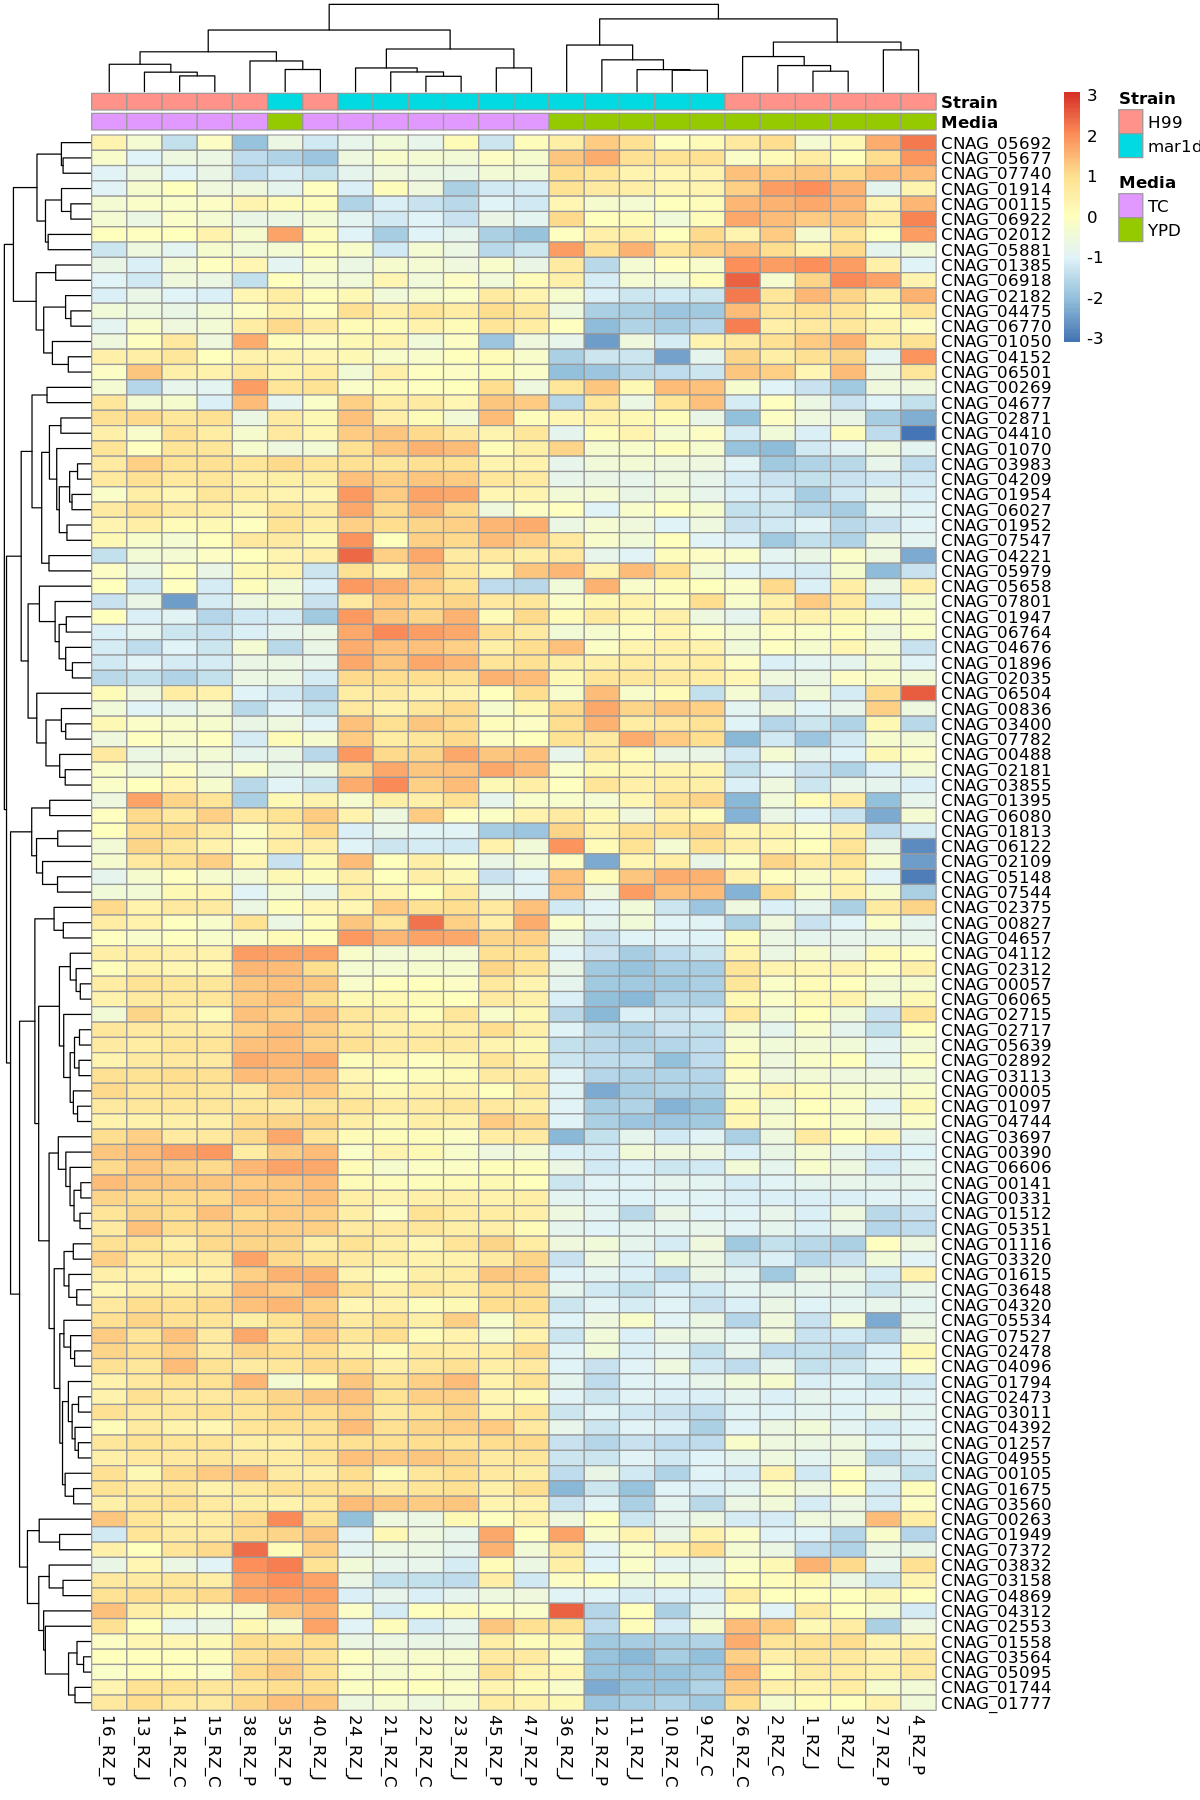

In [52]:
### Annotate heatmap with Media and Strain status
options(repr.plot.width=10, repr.plot.height=15)
pheatmap(assay(rld)[genelst,],
         scale = "row",
         annotation_col = annodf)

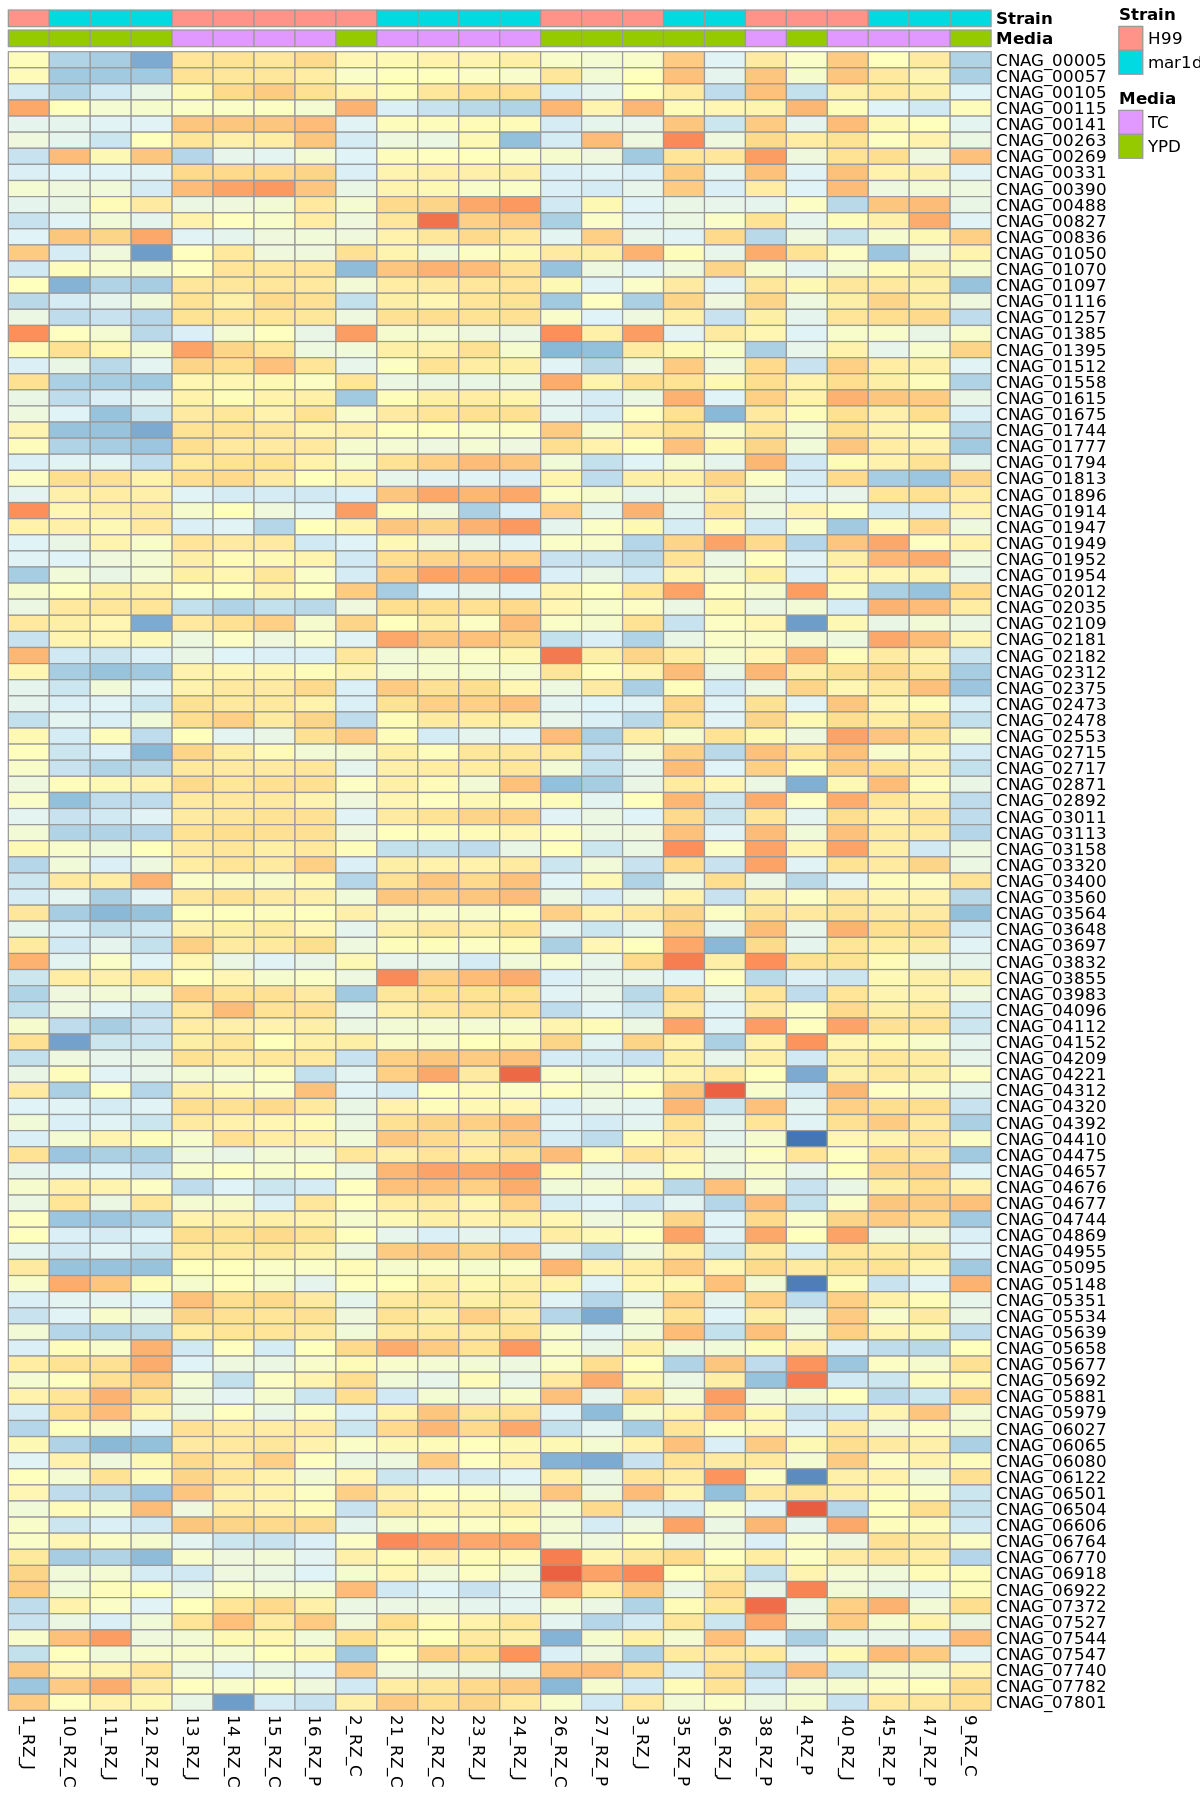

In [53]:
### Add main title, drop legend and disable clustering on columns and rows
options(repr.plot.width=10, repr.plot.height=15)
pheatmap(assay(rld)[genelst,],
         scale = "row",
         annotation_col = annodf,
         legend = FALSE,
         cluster_rows = FALSE,
         cluster_cols = FALSE)

After this, you could try to compare the results with the differential expressed genes you found.

# Visualization with KEGG pathway map

<img src="http://bio-bigdata.hrbmu.edu.cn/lncSubpathway/images/KEGG%20Graph.png" alt="Arginine and proline metabolism from http://bio-bigdata.hrbmu.edu.cn/lncSubpathway/help.jsp" width="500px">
[link to the source of image](http://bio-bigdata.hrbmu.edu.cn/lncSubpathway/help.jsp)

## Problem

There are three cryptococcus strain in [KEGG](https://www.genome.jp/kegg/catalog/org_list.html)
- [Cryptococcus neoformans var. neoformans JEC21](https://www.genome.jp/kegg-bin/show_organism?org=cne) `-> cne`
- [Cryptococcus neoformans var. neoformans B-3501A](https://www.genome.jp/kegg-bin/show_organism?org=cnb) `-> cnb`
- [Cryptococcus gattii WM276](https://www.genome.jp/kegg-bin/show_organism?org=cgi) `-> cgi`

## Solution

<img src="./fig/04 Ortholog mapping.png">

----

## Choose a species for ortholog mapping from C. neoformans h99
Which species will you choose?
- Human
- mice
- Sacchromyces cerevisiae
- Cryptococcus neoformans JEC21

<img src="https://www.researchgate.net/profile/Phelim_Yong/publication/267707743/figure/fig1/AS:295581927919616@1447483631186/Phylogenetic-comparisons-of-C-neoformans-Aspergillus-spp-Candida-spp-and-S.png" alt="phylogenetic tree of Cryptococcus">
[link to the source of image](https://www.researchgate.net/figure/Phylogenetic-comparisons-of-C-neoformans-Aspergillus-spp-Candida-spp-and-S_fig1_267707743)

In [4]:
h99_jec21 <- read_tsv(
    file.path(INFODIR, 'h99_jec21_syntenic_orthologs.txt'), 
    col_names = TRUE)
colnames(h99_jec21) <- c('h99', 'source', 'jec21', '_')

head(h99_jec21)

Warning message:
“Missing column names filled in: 'X4' [4]”Parsed with column specification:
cols(
  `[Gene ID]` = col_character(),
  `[source_id]` = col_character(),
  `[Input Ortholog(s)]` = col_character(),
  X4 = col_character()
)


h99,source,jec21,_
CNAG_00006,CNAG_00006-t26_1,CNA00070,NA
CNAG_00007,CNAG_00007-t26_1,CNA00060,NA
CNAG_00008,CNAG_00008-t26_1,CNA00050,NA
CNAG_00009,CNAG_00009-t26_1,CNA00040,NA
CNAG_00010,CNAG_00010-t26_1,CNA00030,NA
CNAG_00011,CNAG_00011-t26_1,CNA00020,NA


In [5]:
### arrange the data frame
h99_jec21 <- h99_jec21 %>% 
    dplyr::select(h99, jec21) %>%  # select the h99 and jec21 gene

    # Split delimited strings "," in a column and insert as new rows
    mutate(jec21 = strsplit(as.character(jec21), ",")) %>% 
    unnest(jec21) %>%
    mutate(jec21 = trimws(jec21)) %>%

    # remove duplication
    distinct
                          

### show several rows
h99_jec21 %>% tail(10)

h99,jec21
CNAG_12996,CNC02300
CNAG_12997,CNC02355
CNAG_13015,CNK02280
CNAG_13018,CNK02420
CNAG_13027,CNK02710
CNAG_13077,CNM01970
CNAG_13085,CNL02210
CNAG_13085,CNL02220
CNAG_13103,CNN00110
CNAG_13124,CNN01160


# Quick Example

let's use a more simpler case as an example

In [11]:
idx <- 1
genesets_cne_h99[idx]

$`ec00010 | Glycolysis / Gluconeogenesis`
 [1] "CNAG_00038" "CNAG_00057" "CNAG_00515" "CNAG_00735" "CNAG_00797"
 [6] "CNAG_01078" "CNAG_01120" "CNAG_01675" "CNAG_01820" "CNAG_01955"
[11] "CNAG_02035" "CNAG_02377" "CNAG_02489" "CNAG_02736" "CNAG_02903"
[16] "CNAG_03072" "CNAG_03358" "CNAG_03916" "CNAG_04217" "CNAG_04523"
[21] "CNAG_04659" "CNAG_04676" "CNAG_05059" "CNAG_05113" "CNAG_06035"
[26] "CNAG_06313" "CNAG_06628" "CNAG_06699" "CNAG_06770" "CNAG_07004"
[31] "CNAG_07316" "CNAG_07559" "CNAG_07660" "CNAG_07745"

suppose we have five genes from h99, strangely the value KEGG accept is range -1 to 1. This will be the problem when we want to deal with the log2 fold change

In [6]:
genelst <- data.frame(
    # Example one
    h99   = c("CNAG_06313", "CNAG_03916", "CNAG_00057", "CNAG_06770", "CNAG_06699"),
    # Example two
    #h99   = c("CNAG_00038", "CNAG_00057", "CNAG_00515", "CNAG_00735", "CNAG_00797"),
    value = seq(-1, 1, length.out = 5)
)
print(genelst)

         h99 value
1 CNAG_06313  -1.0
2 CNAG_03916  -0.5
3 CNAG_00057   0.0
4 CNAG_06770   0.5
5 CNAG_06699   1.0


map to the ortholog of the jec21

In [7]:
dat <- dplyr::left_join(genelst, h99_jec21, by = "h99")
head(dat)

Warning message:
“Column `h99` joining factor and character vector, coercing into character vector”

h99,value,jec21
CNAG_06313,-1.0,CNN00430
CNAG_03916,-0.5,CNB04050
CNAG_00057,0.0,CNA00470
CNAG_06770,0.5,CNB00300
CNAG_06699,1.0,CNF03160


The ortholog mapping is not strictly one to one mapping. We often need to summarize each "mapping group" into one value. Here we use `mean` to summarize them

In [8]:
dat <- dat %>% 
    group_by(jec21) %>% 
    summarize(value = mean(value))
head(dat)

jec21,value
CNA00470,0.0
CNB00300,0.5
CNB04050,-0.5
CNF03160,1.0
CNN00430,-1.0


the pathview only accept the object to be vector. you can either give gene character vector without numeric numbers (the color of the label will be the same for all genes), or you can provide numeric vector with the name as genes

In [9]:
tmp <- dat$value
names(tmp) <- dat$jec21
print(tmp)

CNA00470 CNB00300 CNB04050 CNF03160 CNN00430 
     0.0      0.5     -0.5      1.0     -1.0 


lets run the function pathview to query the pathway

In [10]:
pathview(
    gene.data = tmp,        # a vector of your gene or numeric vector of your gene expression
    out.suffix = "example", # suffix of your image filename
    pathway.id = "00010",   # pathway id used in KEGG
    species = "cne",        # specie you are interested
    gene.idtype = "kegg",   # the type of your id
    kegg.native = T,      
    same.layer=T)

Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling '

  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$c

In [11]:
pathview(
    gene.data = tmp,        # a vector of your gene or numeric vector of your gene expression
    out.suffix = "test", # suffix of your image filename
    pathway.id = "00010",   # pathway id used in KEGG
    species = "cne",        # specie you are interested
    gene.idtype = "entrez",   # the type of your id
    kegg.native = T,      
    same.layer=T)

Info: Getting gene ID data from KEGG...
Info: Done with data retrieval!


ERROR: Error in mol.sum(gene.data, gene.idmap): no ID can be mapped!


There will be two images downloaded.

![](cne00010.png)

![](cne00010.example.png)

# Show our log2 fold change value on the KEGG map

Review: get the log2 fold change of genes which we already demonstrated in the previous note

In [19]:
### Get results from DESeq2 DE analysis
ddsres_add_media <- DESeq2::results(dds_add, contrast = c("Media", "YPD" , "TC"))

### Extract the estimated fold changes
ddsfc_add_media  <- ddsres_add_media$log2FoldChange

### Assign the gene name to the fold change vector
names(ddsfc_add_media) <- rownames(ddsres_add_media)

head(ddsfc_add_media)

CNAG_00001  CNAG_00002  CNAG_00003  CNAG_00004  CNAG_00005  CNAG_00006 
 0.04112783 -0.09019082 -0.36475113 -0.60361128 -0.85771100  0.36899620

Recall the pathway we might be interested

In [20]:
gageres_media$greater %>% head(2)

,p.geomean,stat.mean,p.val,q.val,set.size,exp1
ec00053 | Ascorbate and aldarate metabolism,4.502818e-06,4.561043,4.502818e-06,0.001328574,100,4.502818e-06
ec00051 | Fructose and mannose metabolism,1.034578e-05,4.365729,1.034578e-05,0.001328574,103,1.034578e-05


Let's try another example

In [21]:
pathid     <- "ec00051"
pathid_num <- "00051"
genelst    <- get_gset_lst_from_id(pathid, genesets_cne_h99)
head(genelst, 10)

[1] "CNAG_00005" "CNAG_00057" "CNAG_00105" "CNAG_00115" "CNAG_00141"
 [6] "CNAG_00263" "CNAG_00269" "CNAG_00331" "CNAG_00390" "CNAG_00488"

choose the log2 fold change of the genes in our gene list

In [22]:
pathgene_fc <- ddsfc_add_media[genelst]
pathgene_fc

CNAG_00005   CNAG_00057   CNAG_00105   CNAG_00115   CNAG_00141   CNAG_00263 
-0.857711000 -0.775717496 -0.757612897  0.944105304 -1.968804286 -0.092158657 
  CNAG_00269   CNAG_00331   CNAG_00390   CNAG_00488   CNAG_00827   CNAG_00836 
-0.070530818 -3.516597674 -0.492619257 -0.432709486 -2.049680390  0.334849802 
  CNAG_01050   CNAG_01070   CNAG_01097   CNAG_01116   CNAG_01257   CNAG_01385 
 0.046814596 -1.167087666 -1.212370591 -0.858921852 -1.502048418  0.229848685 
  CNAG_01395   CNAG_01512   CNAG_01558   CNAG_01615   CNAG_01675   CNAG_01744 
-0.066059583 -1.114911418  0.035674587 -0.717639222 -1.084209831 -0.416222426 
  CNAG_01777   CNAG_01794   CNAG_01813   CNAG_01896   CNAG_01914   CNAG_01947 
-0.409392263 -2.098486322  0.170369697 -0.162398450  0.353173855 -0.037135267 
  CNAG_01949   CNAG_01952   CNAG_01954   CNAG_02012   CNAG_02035   CNAG_02109 
-0.151527633 -1.219104336 -2.573242586  0.361360492  0.037250128 -0.096399026 
  CNAG_02181   CNAG_02182   CNAG_02312   CNAG_02375   CNAG_02473   CNAG_02478 
-0.532697176  0.313454656 -0.369125818 -0.366283141 -1.356067748 -0.976917600 
  CNAG_02553   CNAG_02715   CNAG_02717   CNAG_02871   CNAG_02892   CNAG_03011 
 0.014837136 -0.304814899 -0.792932702 -0.262752456 -0.878451326 -1.945456286 
  CNAG_03113   CNAG_03158   CNAG_03320   CNAG_03400   CNAG_03560   CNAG_03564 
-1.715717940 -0.002652277 -1.179571855 -0.329433634 -1.403194694 -0.242365139 
  CNAG_03648   CNAG_03697   CNAG_03832   CNAG_03855   CNAG_03983   CNAG_04096 
-0.448749724 -0.591660333  0.080048848 -0.448651662 -1.158809266 -2.572063360 
  CNAG_04112   CNAG_04152   CNAG_04209   CNAG_04221   CNAG_04312   CNAG_04320 
-0.862055962 -0.098865979 -2.692661577 -0.156140649 -0.037836580 -0.564475512 
  CNAG_04392   CNAG_04410   CNAG_04475   CNAG_04657   CNAG_04676   CNAG_04677 
-1.639464272 -0.395321764 -0.172834460 -1.537312698 -0.042613752 -0.391460184 
  CNAG_04744   CNAG_04869   CNAG_04955   CNAG_05095   CNAG_05148   CNAG_05351 
-1.342368170 -0.043358953 -1.916735957 -0.157011863  0.128632005 -1.158291098 
  CNAG_05534   CNAG_05639   CNAG_05658   CNAG_05677   CNAG_05692   CNAG_05881 
-0.673537739 -0.994268699  0.020212020  0.495927212  0.202130336  0.372488051 
  CNAG_05979   CNAG_06027   CNAG_06065   CNAG_06080   CNAG_06122   CNAG_06501 
-0.098543928 -2.007642959 -0.583768796 -0.124871841  0.126932646 -0.147739879 
  CNAG_06504   CNAG_06606   CNAG_06764   CNAG_06770   CNAG_06918   CNAG_06922 
-0.320941431 -0.696250916 -0.158227817 -0.063404797  0.654438687  0.442957235 
  CNAG_07372   CNAG_07527   CNAG_07544   CNAG_07547   CNAG_07740   CNAG_07782 
-0.103471587 -1.181203162  0.221353574 -0.483434614  0.865517351 -0.098689951 
  CNAG_07801 
 0.068745492

**Problem: how to convert log2 fold change to range(-1, 1)**

You can come up your ways to do it. Here we will divide by the largest absolute value so that we could:  
- preserve the sign
- compare genes "within" a pathway

In [23]:
max(abs(pathgene_fc))

[1] 3.516598

In [24]:
pathgene_fc_scaled <- pathgene_fc / max(abs(pathgene_fc))

cat("range: ", range(pathgene_fc_scaled), "\n")
cat("=======================\n")
print(pathgene_fc_scaled)

range:  -1 0.2684712 
   CNAG_00005    CNAG_00057    CNAG_00105    CNAG_00115    CNAG_00141 
-0.2439036475 -0.2205875018 -0.2154391736  0.2684712301 -0.5598605438 
   CNAG_00263    CNAG_00269    CNAG_00331    CNAG_00390    CNAG_00488 
-0.0262067673 -0.0200565504 -1.0000000000 -0.1400840534 -0.1230477656 
   CNAG_00827    CNAG_00836    CNAG_01050    CNAG_01070    CNAG_01097 
-0.5828589391  0.0952198213  0.0133124685 -0.3318797811 -0.3447566947 
   CNAG_01116    CNAG_01257    CNAG_01385    CNAG_01395    CNAG_01512 
-0.2442479726 -0.4271311527  0.0653610979 -0.0187850841 -0.3170426423 
   CNAG_01558    CNAG_01615    CNAG_01675    CNAG_01744    CNAG_01777 
 0.0101446312 -0.2040720289 -0.3083121618 -0.1183594099 -0.1164171455 
   CNAG_01794    CNAG_01813    CNAG_01896    CNAG_01914    CNAG_01947 
-0.5967376756  0.0484473098 -0.0461805600  0.1004305548 -0.0105599988 
   CNAG_01949    CNAG_01952    CNAG_01954    CNAG_02012    CNAG_02035 
-0.0430892719 -0.3466715413 -0.7317421054  0.1027585539

a quick function for you to map from h99 to jec21

In [25]:
ortholog_mapping(pathgene_fc_scaled, h99_jec21, "h99", "jec21")

Warning message:
“Column `h99` joining factor and character vector, coercing into character vector”

jec21,value
CNA00470,-0.22058750
CNA00960,-0.21543917
CNA01050,0.26847123
CNA01280,-0.55986054
CNA02535,-0.02620677
CNA02580,-0.02005655
CNA03130,-1.00000000
CNA03790,-0.14008405
CNA04690,-0.12304777
CNA05980,-0.02942378


convert the dataframe into a numeric vector where
- names = name of each genes in jec21
- value = the converted log2 fold change

In [26]:
dat <- ortholog_mapping(pathgene_fc_scaled, h99_jec21, "h99", "jec21")
tmp <- dat$value
names(tmp) <- dat$jec21
tmp

Warning message:
“Column `h99` joining factor and character vector, coercing into character vector”

CNA00470      CNA00960      CNA01050      CNA01280      CNA02535 
-0.2205875018 -0.2154391736  0.2684712301 -0.5598605438 -0.0262067673 
     CNA02580      CNA03130      CNA03790      CNA04690      CNA05980 
-0.0200565504 -1.0000000000 -0.1400840534 -0.1230477656 -0.0294237774 
     CNA08060      CNA08130      CNB00300      CNB00370      CNB01480 
-0.5828589391  0.0952198213 -0.0180301537 -0.0449945749 -0.1276090601 
     CNB01950      CNB03210      CNB03450      CNB04710      CNB05750 
-0.1682479454  0.0227631523 -0.1275811747 -0.3295256875 -0.7314067740 
     CNC01290      CNC01860      CNC02470      CNC02760      CNC02850 
-0.2040720289 -0.3083121618 -0.1183594099 -0.3565774105 -0.3565774105 
     CNC03020      CNC03430      CNC03450      CNC04850      CNC05050 
 0.0484473098 -0.0866789230 -0.2254829171 -0.0747178039 -0.2498014862 
     CNC06220      CNC06260      CNC06690      CND01800      CND02230 
-0.5532211717  0.0101446312 -0.3170426423  0.0133124685 -0.3447566947 
     CND02410      CND03740      CND04970      CND05060      CNE00130 
-0.2442479726 -0.4271311527  0.0653610979 -0.0187850841  0.0042191735 
     CNE00820      CNE00870      CNE01740      CNE02340      CNE03540 
-0.2778019240 -0.3856192472 -0.1041583870 -0.1049667468 -0.0311725339 
     CNE03550      CNE03560      CNE04280      CNE05000      CNF00050 
-0.0311725339 -0.0311725339 -0.0274125830  0.0105926613 -0.0280225198 
     CNF00920      CNF02820      CNF02970      CNF04140      CNG00390 
 0.1059228507  0.0574789483  0.1410247228 -0.1979899267 -0.0689203491 
     CNG00430      CNG00790      CNG01830      CNG02580      CNG04090 
-0.3990205374  0.2461235067 -0.0936796484 -0.3354298570 -0.0007542168 
     CNG04480      CNH00170      CNH01850      CNH02800      CNH02960 
-0.4878914505 -0.3293783382 -0.1915310769 -0.2827359826  0.0057476065 
     CNI00060      CNI00820      CNI01380      CNI01560      CNI02290 
-0.0280640439 -0.0491482040 -0.1124159771 -0.4662075177 -0.1605175128 
     CNI02370      CNI02890      CNI03480      CNI03630      CNI04360 
-0.0107594283 -0.0281141002 -0.7657007784 -0.0444010557 -0.2451392062 
     CNJ00930      CNJ01080      CNJ01090      CNJ01750      CNJ02970 
-0.4371591068 -0.0121178923 -0.1113178760 -0.3817235562 -0.0123298020 
     CNK00080      CNK00120      CNK01230      CNK01260      CNK02370 
 0.1259618746  0.1860999603 -0.1374722556  0.0629453791 -0.0461805600 
     CNK02570      CNK02860      CNK02880      CNK02910      CNK02930 
 0.1004305548 -0.0105599988 -0.0430892719 -0.3466715413 -0.7317421054 
     CNK03470      CNL04750      CNL05270      CNL06190      CNL06600 
 0.1027585539  0.0365785390 -0.0446487992  0.0195488647 -0.5450540932 
     CNM00370      CNM00740      CNM00890      CNM01280      CNN02170 
-0.5709049330 -0.1660038621 -0.0355092770  0.0360952995 -0.0912647567 
     CNN02260      CNN02290 
-0.0420121642 -0.0912647567

We are ready to query the image from KEGG.

In [27]:
print(pathid)        # suffix of your image filename
print(pathid_num)

[1] "ec00051"
[1] "00051"


In [28]:
pathview(
    gene.data  = tmp,           # a vector of your gene or numeric vector of your gene expression
    out.suffix = pathid,        # suffix of your image filename
    pathway.id = pathid_num,    # pathway id used in KEGG
    species = "cne",            # specie you are interested
    gene.idtype = "kegg",       # the type of your id
    kegg.native = T,      
    same.layer=T)

Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling 'structure(NULL, *)' is deprecated, as NULL cannot have attributes.
  Consider 'structure(list(), *)' instead.”Warning message in structure(x$children, class = "XMLNodeList"):
“Calling '